In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Convert categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [4]:
# Create X and y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [5]:
# Create X and y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a new model with increased layers and neurons
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # Increased to 100 neurons
    tf.keras.layers.Dense(50, activation="relu"),   # Additional layer with 50 neurons
    tf.keras.layers.Dense(50, activation="relu"),   # Additional layer with 50 neurons
    tf.keras.layers.Dense(1)
])


# Compile the model with Adam optimizer
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 13289.6035 - mae: 13289.6035
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13184.5225 - mae: 13184.5225
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12630.7842 - mae: 12630.7842
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10549.6289 - mae: 10549.6289
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7670.5547 - mae: 7670.5547
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7406.9492 - mae: 7406.9492
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7370.8394 - mae: 7370.8394
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7313.4131 - mae: 7313.4131
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7270.5991 - mae: 7270.5991
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7227.4956 - mae: 7227.4956
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7183.2285 - mae: 7183.2285
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [9]:
# Evaluate the model
insurance_model_loss, insurance_model_mae = insurance_model.evaluate(X_test, y_test)
print(f"Model Loss: {insurance_model_loss}, Model MAE: {insurance_model_mae}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1921.3077 - mae: 1921.3077
Model Loss: 2084.61669921875, Model MAE: 2084.61669921875


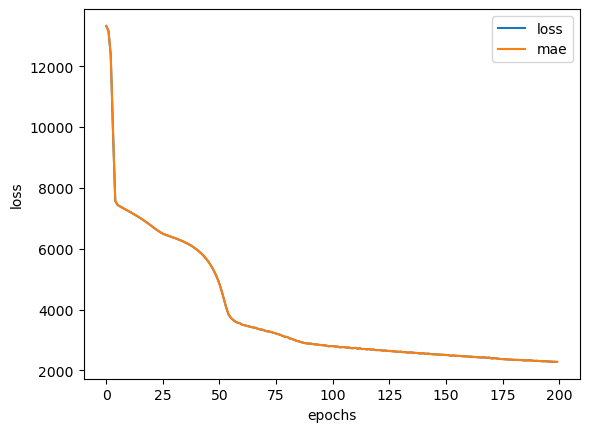

In [10]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");